## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Reading, preprocessing, and splitting the dataset into the training and test set

For data preprocessing, we standardize features by removing the mean and scaling to unit variance. This generally helps the gradient descent algorithm converge faster.

In [2]:
#importing the dataset
dataset = pd.read_excel('sEMG_dataset.xlsx')
X = dataset.iloc[:,0:6].values
y = dataset.iloc[:,6].values

#Feature scaling
X = np.transpose(np.array([(X[:,i]-np.mean(X[:,i]))/(np.std(X[:,i])) for i in range(X.shape[1])]))

#splitting the dataset into the training set and test set
test_size = 0.25

ds = np.concatenate((X, y[:,np.newaxis]), axis=1)

ds_shuffle = np.random.permutation(ds)
X_val = ds_shuffle[:math.ceil(test_size*ds_shuffle.shape[0]),0:6]
y_val = ds_shuffle[:math.ceil(test_size*ds_shuffle.shape[0]),6]    
X_train = ds_shuffle[math.ceil(test_size*ds_shuffle.shape[0]):,0:6]
y_train = ds_shuffle[math.ceil(test_size*ds_shuffle.shape[0]):,6]

### Defining some variables and parameters

In [3]:
num_training_examples = X_train.shape[0]
num_features = X_train.shape[1]
bias = np.ones((num_training_examples, 1))
X_train = np.append(bias, X_train, axis=1)
bias = np.ones((X_val.shape[0], 1))
X_val = np.append(bias, X_val, axis=1)
theta = np.random.rand(num_features+1, 1)
grad = np.zeros((num_features+1, 1))
J=0

### Hyperparameters

we set the hyperparameters of the learning rate, regularization factor, and the number of iterations before training begins and the learning algorithm uses them to learn the parameters. 

In [4]:
#hyperparameters
num_iter = 6000
eta = 0.1
lambdaa = 1
cost_function = []

## Training

Here to represent the hypothesis form, implement gradients calculation, and weight updates (gradient descent), **we use just numpy.** 

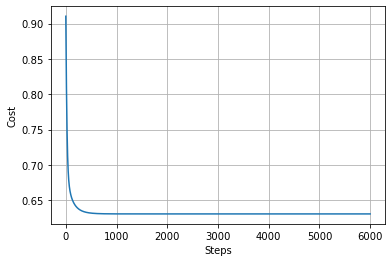

In [5]:
#Gradient descent
for i in range(num_iter):
    
    #some calculations
    h = 1/(1+np.exp(-1* np.dot(X_train,theta)))
    regularization_term = ((sum((theta[1:])**2))*lambdaa)/(2*num_training_examples)
    
    J = (np.dot(-1*np.transpose(y_train[:,np.newaxis]),np.log(h))-
         np.dot(np.transpose((1-y_train[:,np.newaxis])),np.log(1-h)))/num_training_examples
         
    J = J + regularization_term     
    
    grad[0]= (sum(h - y_train[:,np.newaxis]))/num_training_examples
    
    grad[1:]= (np.dot(np.transpose(X_train[:,1:]),(h-y_train[:,np.newaxis]))+
               lambdaa* theta[1:])/num_training_examples
               
    #updating parameters
    
    theta[0] = theta[0]- eta* grad[0]
    theta[1:] = theta[1:] - eta* grad[1:]
    cost_function.append(np.squeeze(J))

plt.xlabel('Steps')
plt.ylabel('Cost')
plt.grid(True)
plt.plot(range(num_iter),cost_function)

## Making predictions

In [6]:
y_pr_list = [1 if 1/(1+np.exp(-1* np.dot(X_val[i],theta)))>=0.5 else 0 for i in range(y_val.shape[0])]
y_pred = np.array(y_pr_list)

## Evaluation

In [7]:
#Making the Confusion Matrix
cm = np.zeros((2,2))
for i in range(y_pred.shape[0]):
    if y_pred[i]==0 and y_val[i]==0:
        cm[0][0]+=1
    if y_pred[i]==1 and y_val[i]==0:
        cm[0][1]+=1    
    if y_pred[i]==0 and y_val[i]==1:
        cm[1][0]+=1
    if y_pred[i]==1 and y_val[i]==1:
        cm[1][1]+=1
    
accuracy = (cm[0][0]+cm[1][1])/y_pred.shape[0]
print('confusion_matrix:', cm)
print('accuracy:', accuracy)    

confusion_matrix: [[365. 179.]
 [165. 312.]]
accuracy: 0.66307541625857
